# IA376I – Tópicos em Engenharia de Computação VII
## Tópico: Análise de Dados Visual (Visual Analytics)

Professora: Wu, Shin - Ting<br>
Aluno: Luiz Roberto Albano Junior RA: 272746<br>
Tarefa 1 - 05/04/2024

---


**Base de dados utilizada:**<br>
#### World University Rankings 2023
Url: https://www.kaggle.com/datasets/alitaqi000/world-university-rankings-2023

**Pergunta:** Como as universidades de diferentes países se comparam em termos de classificação mundial e quais são os principais fatores que contribuem para suas classificações?

---

#### Importação dos dados

In [2]:
import pandas as pd
import numpy as np
from plotnine import *

#carregamento do arquivo de dados
university_ranking = pd.read_csv("World-University-Rankings-2023.csv")
#university_ranking.head()
university_ranking

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,196,University of Erlangen-Nuremberg,Germany,"30,303",43.4,13%,51 : 49,54.5,44.6,47.5,68.8,90.7,53.5
195,196,Sichuan University,China,"49,543",15.8,6%,NaN,54.5,57.1,58.6,48.6,93.4,38.7
196,198,Durham University,United Kingdom,"18,425",14.1,35%,54 : 46,54.4,40.0,44.6,70.0,39.4,94.3
197,198,Queen’s University Belfast,United Kingdom,"19,060",15.8,39%,57 : 43,54.4,31.1,37.9,84.4,41.6,97.4


**Observações importantes sobre a base de dados:**<br>
- Escolhi esta base por ser a base mais atualizada que encontrei. Outras fontes de dados possuíam dados de mais de 10 anos atrás.
- A base possui algumas colunas com dados nulos. Para a coluna Location, pesquisei o país de algumas universidades que estavam sem esta informação

<br>

---

### Comparação da classificação das universidades agrupadas por país
Neste gráfico desejo representar um comparativo por país da classificação de suas universidades. Para tal visualização estou agrupando as universidades por país e obtendo a médida da avaliação geral para ordenação.

**Tratamento dos dados**

In [3]:
rank_by_country = university_ranking[['Name of University', 'Location', 'OverAll Score']]

#Converto os dados da coluna para valores numéricos pois o DataFrame apresenta valores agrupados ou não numéricos
rank_by_country["OverAll Score"] = pd.to_numeric(rank_by_country["OverAll Score"], errors='coerce')

#Filtrando os registros, excluindo as colunas NaN
rank_by_country = rank_by_country[rank_by_country['OverAll Score'].notna() & rank_by_country['Location'].notna()]

#Agrupa as universidades por país e sua média
rank_by_country = rank_by_country.groupby('Location')['OverAll Score'].mean().sort_values(ascending=False).reset_index()

#Ordena os valores do Eixo Vertical
countries = rank_by_country.groupby('Location')['OverAll Score'].mean().sort_values(ascending=False).reset_index()['Location'].tolist()
countries_cat = pd.Categorical(rank_by_country['Location'], categories=countries)
rank_by_country = rank_by_country.assign(Country=countries_cat)



/tmp/ipykernel_9214/2137760829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Plotagem do gráfico**<br>
Gráfico em barras para visualização do comparativo

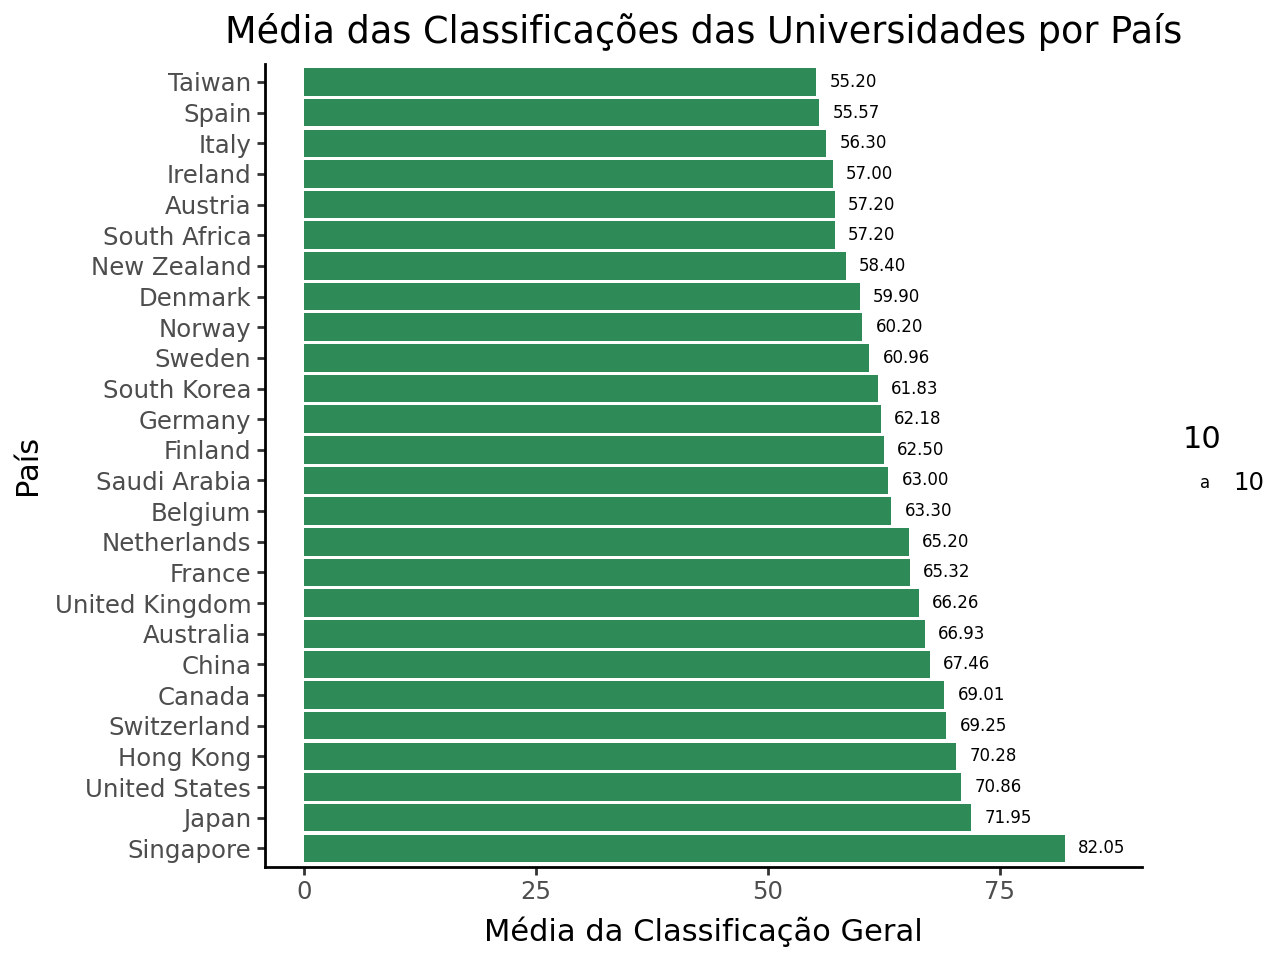

In [5]:
(
    ggplot(rank_by_country)
    + aes(x='Country', y='OverAll Score', label='OverAll Score', size=10)
    + geom_bar(stat='identity', fill='seagreen', show_legend=False)
    + geom_text(format_string="{:.2f}", nudge_y=4)
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
    + labs(title='Média das Classificações das Universidades por País', x='País', y='Média da Classificação Geral')
    + coord_flip()
    + theme_classic()
)

---

### Visualização de coorelações entre parâmetros


**Tratamento dos dados**


In [6]:
# Filtrar as colunas necessárias e remover valores nulos
university_reputation = university_ranking[['Name of University', 'Location', 'University Rank', 'OverAll Score', 'Research Score', 'No of student', 'No of student per staff']].dropna()
university_reputation["Research Score"] = pd.to_numeric(university_reputation["Research Score"], errors='coerce')
university_reputation["OverAll Score"] = pd.to_numeric(university_reputation["OverAll Score"], errors='coerce')
university_reputation["University Rank"] = pd.to_numeric(university_reputation["University Rank"], errors='coerce')

university_reputation.head()

,Name of University,Location,University Rank,OverAll Score,Research Score,No of student,No of student per staff
0,University of Oxford,United Kingdom,1,96.4,99.7,"20,965",10.6
1,Harvard University,United States,2,95.2,99.0,"21,887",9.6
2,University of Cambridge,United Kingdom,3,94.8,99.5,"20,185",11.3
3,Stanford University,United States,3,94.8,96.7,"16,164",7.1
4,Massachusetts Institute of Technology,United States,5,94.2,93.6,"11,415",8.2


**Correlação entre Pesquisa Acadêmica (Research Score) e Classificação Mundial (University Rank)**<br><br>
Para facilitar a leitura e entendimento dos fatores, estou limitando o DataFrame para as primeiras 50 universidades.

In [7]:
university_reputation_50 = university_reputation.iloc[:50]
university_reputation_50

,Name of University,Location,University Rank,OverAll Score,Research Score,No of student,No of student per staff
0,University of Oxford,United Kingdom,1,96.4,99.7,"20,965",10.6
1,Harvard University,United States,2,95.2,99.0,"21,887",9.6
2,University of Cambridge,United Kingdom,3,94.8,99.5,"20,185",11.3
3,Stanford University,United States,3,94.8,96.7,"16,164",7.1
4,Massachusetts Institute of Technology,United States,5,94.2,93.6,"11,415",8.2
5,California Institute of Technology,United States,6,94.1,97.0,"2,237",6.2
6,Princeton University,United States,7,92.4,95.9,"8,279",8.0
7,"University of California, Berkeley",United States,8,92.1,95.8,"40,921",18.4
8,Yale University,United States,9,91.4,92.7,"13,482",5.9
9,Imperial College London,United Kingdom,10,90.4,90.8,"18,545",11.2


---

### Pesquisa x Classificação

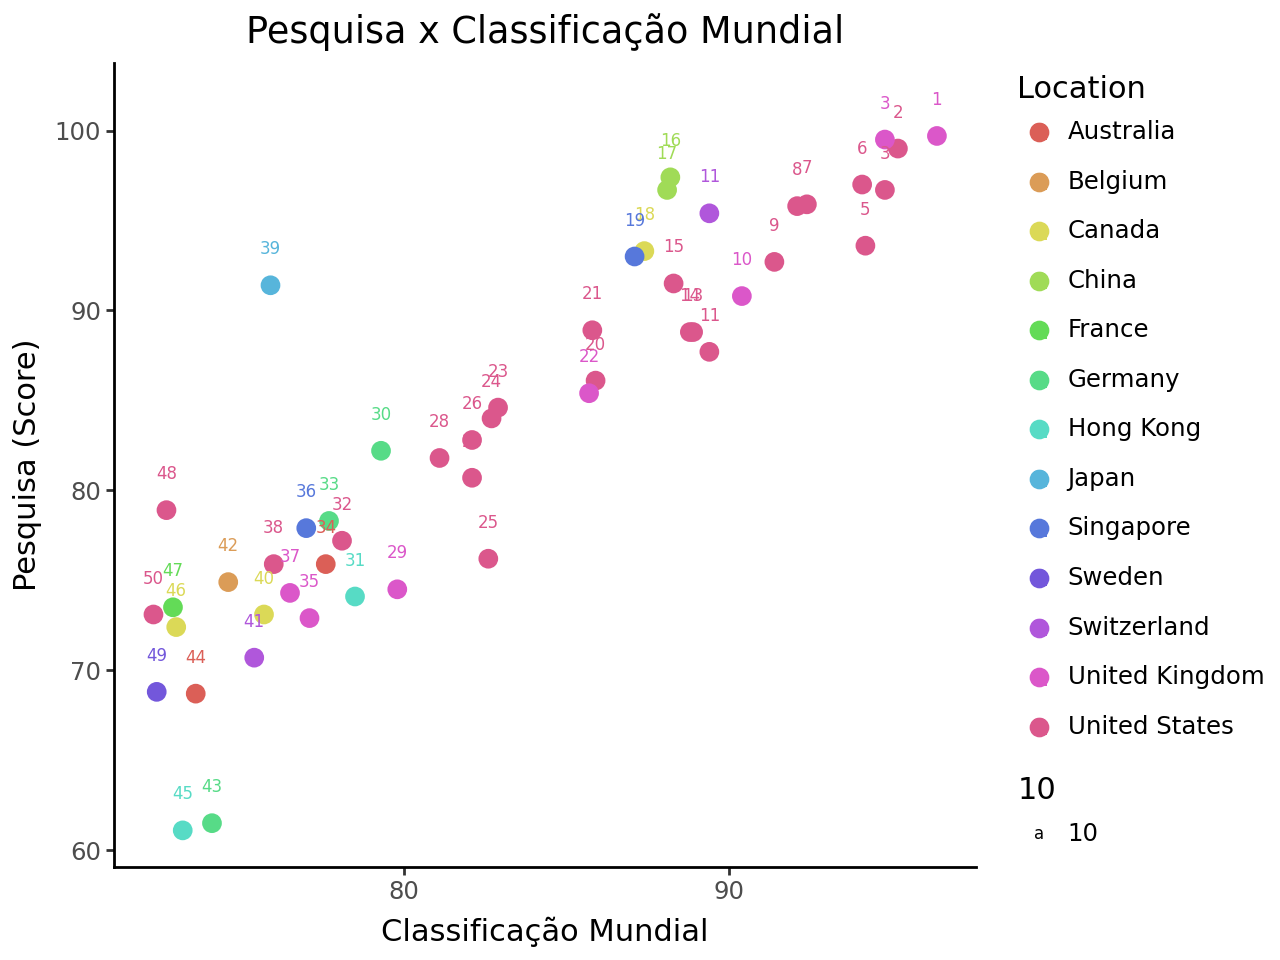

In [8]:
# Criar o gráfico de dispersão
(
    ggplot(university_reputation_50)
    + aes(y='Research Score', x='OverAll Score', color='Location', label='University Rank', size=10)
    + labs(title='Pesquisa x Classificação Mundial', y='Pesquisa (Score)', x='Classificação Mundial')
    + geom_abline(intercept=university_reputation_50['Research Score'].max(), 
        slope=(1- np.log10(university_reputation_50['Research Score'].mean())), linetype="dashed", color="darkgrey")
    + geom_point(show_legend=True, size=3)
    + geom_text(nudge_y=2)
    + theme()
    + theme_classic()
)

---
### Estudantes por Professor x Pontuação Geral

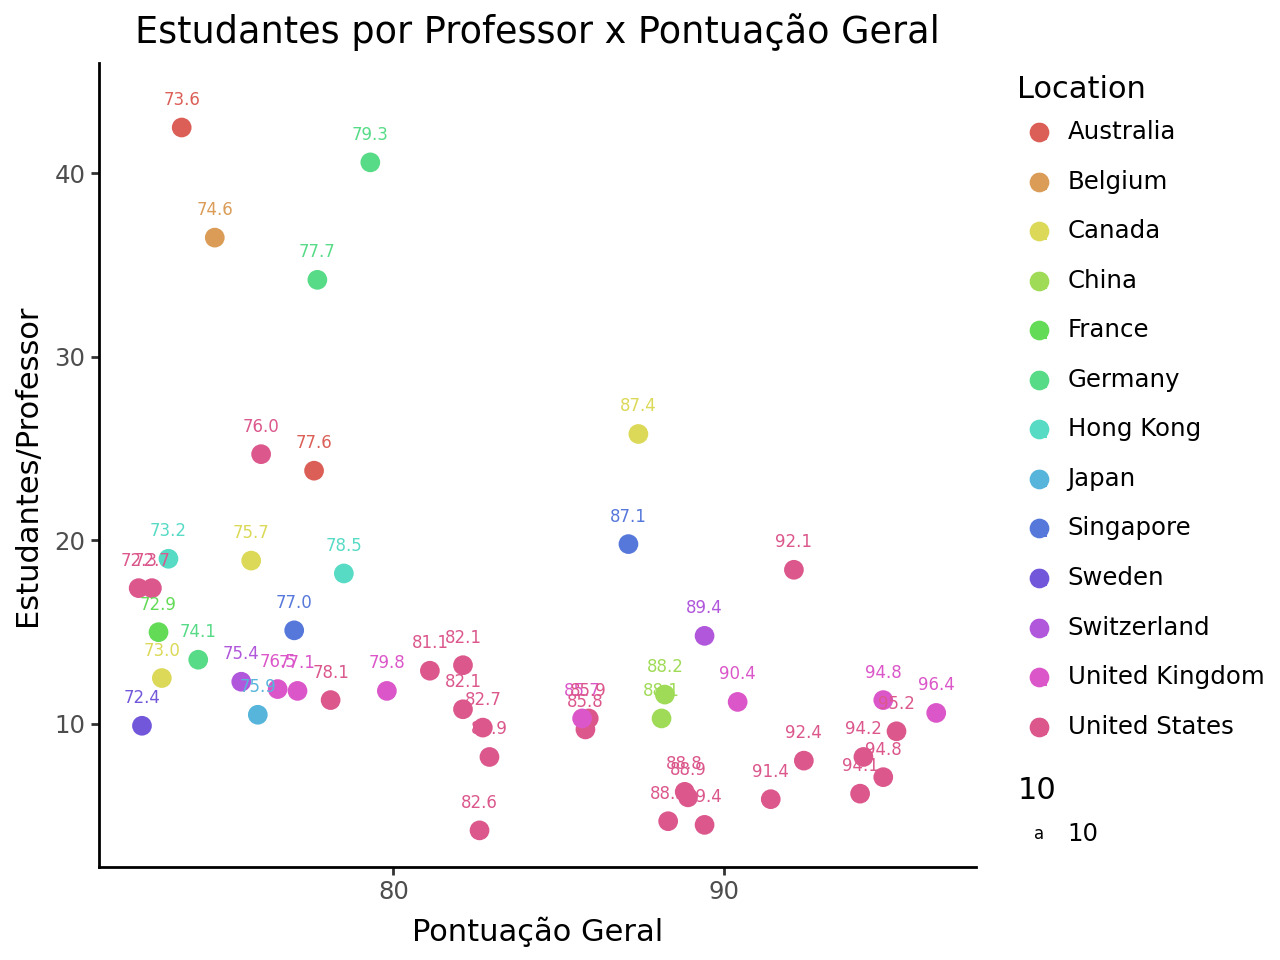

In [9]:
(
    ggplot(university_reputation_50)
    + aes(y='No of student per staff', x='OverAll Score', color='Location', label='OverAll Score', size=10)
    + labs(title='Estudantes por Professor x Pontuação Geral', y='Estudantes/Professor', x='Pontuação Geral')
    + geom_point(show_legend=True, size=3)
    + geom_text(nudge_y=1.5)
    + theme()
    + theme_classic()
)